# MIR HW2
### Mohammadreza Daviran - 98101566

I have gathered The Office transcript from [this website](https://transcripts.foreverdreaming.org/viewforum.php?f=574). Then I did some preprocessing on the data and analyzed it which I will explain later.

## Crawl and find the dataset

### Install and import required libraries

In [301]:
!pip install httplib2

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup, SoupStrainer
import urllib.request
import time
import os
from pathlib import Path
import httplib2

### pass the requirements and find all the links

In [2]:
def get_links(url, linkList = []):
    http = httplib2.Http()
    status, response = http.request(url)
    for link in BeautifulSoup(response, 'html.parser', parse_only=SoupStrainer('a')):
        if link.has_attr('class') and 'topictitle' in link['class'] and link.has_attr('title') and 'Thank' not in link['title']:
            sublink = link['href'][2:]
            fullLink = 'https://transcripts.foreverdreaming.org/' + sublink
            linkList.append(fullLink)
    return linkList

In [3]:
linkList = []
url = "https://transcripts.foreverdreaming.org/viewforum.php?f=574"
linkList = get_links(url)

for index in range(25,200,25):
    url = f'{url}&start={index}'
    linkList = get_links(url, linkList)

### save the data

After finding all the links, I used BeautifulSoup to download the scripts and save them in "The_Office_transcript.txt". Besides it is possible to save all the episodes and seasons separately in different scripts(These are already in the dataset).

In [4]:
def episode_num(num):
    if i < 10:
        episode = "0" + str(num)
    else:
        episode = str(num)

In [288]:
# number_of_episodes = [6, 22, 25, 19, 28, 26, 26, 24, 25]
separated_by_seasons = False

path = 'The_Office_dataset'
Path(path).mkdir(parents=True, exist_ok=True)

if not separated_by_seasons:
    transcript = open('The_Office_transcript.txt', 'a+')

counter = 1
for link in linkList:
    
    html = urlopen(link).read()
    soup = BeautifulSoup(html, features="html.parser")

    for script in soup(["script", "style"]):
        script.extract()   

    text = soup.get_text()

    lines = (line.strip() for line in text.splitlines())
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    text = '\n'.join(chunk for chunk in chunks if chunk)
    text = text.strip()
    
    print(text[:5])
    
    season_num = text.strip()[:2]

    if separated_by_seasons:
        path = os.path.join('The_Office_dataset', f'season_{season_num}')
        Path(path).mkdir(parents=True, exist_ok=True)

    if separated_by_seasons:
        file = open("The_Office_dataset/season_" + str(season_num) + "/" + text[:5] + '.txt', 'w')
        file.write(text)
        file.close()
    else:
        transcript.write(text)
        transcript.write("\n")
    
    if counter == 190:
        break
    counter += 1


transcript.close()

01x01
01x02
01x03
01x04
01x05
01x06
01x99
02x01
02x02
02x03
02x04
02x05
02x06
02x07
02x09
02x10
02x11
02x12
02x13
02x14
02x15
02x16
02x17
02x18
02x19
02x21
02x22
02x99
03x00
03x01
03x02
03x03
03x04
03x05
03x06
03x07
03x08
03x09
03x10
03x12
03x13
03x14
03x15
03x16
03x17
03x18
03x19
03x20
03x21
03x22
03x23
03x24
03x99
04x01
04x03
04x05
04x07
04x09
04x11
04x12
04x13
04x14
04x15
04x16
04x17
04x18
04x99
05x00
05x01
05x03
05x04
05x05
05x06
05x07
05x08
05x09
05x10
05x11
05x12
05x13
05x14
05x16
05x17
05x18
05x19
05x20
05x21
05x23
05x24
05x25
05x26
05x28
05x29
05x30
05x99
06x00
06x01
06x03
06x04
06x06
06x07
06x08
06x10
06x11
06x12
06x13
06x14
06x15
06x16
06x17
06x19
06x20
06x21
06x22
06x23
06x24
06x25
06x26
07x01
07x02
07x03
07x04
07x05
07x06
07x07
07x08
07x09
07x10
07x11
07x13
07x14
07x15
07x16
07x17
07x18
07x19
07x20
07x21
07x22
07x23
07x24
07x25
08x01
08x02
08x03
08x04
08x05
08x06
08x07
08x08
08x09
08x11
08x12
08x13
08x14
08x15
08x16
08x17
08x18
08x19
08x20
08x21
08x22
08x23
08x24
08x99
09x0

## Separate the script

### Install and import required libraries

In this section I remove parentheses and modified the data. Further I find a script for each one of 25 main casts.

In [133]:
import random 
import tqdm
import nltk
from nltk.corpus import brown
from nltk import word_tokenize
import string
import csv
import re
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [250]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohammadreza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohammadreza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mohammadreza/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mohammadreza/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mohammadreza/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [251]:
def modify(text):
    text = text.strip('\n')
    text = text.strip('\t')
    text = text.replace('\n','')
    text = text.replace('\t','')
    return text

### script for main characters
I've separated the transcript into 25 sections for each person to analyze later.

In [212]:
Michael = ''
Dwight = ''
Jim = ''
Pam = ''
Ryan = ''
Stanley = ''
Kevin = ''
Meredith = ''
Angela = ''
Oscar = ''
Phyllis = ''
Roy = ''
Jan = ''
Toby = ''
Kelly = ''
Andy = ''
Creed = ''
Darryl = ''
Erin = ''
Gabe = ''
Holly = ''
Robert = ''
Nellie = ''
Clark = ''
Pete = ''

transcript = ""

main_characters = {}

file = open('The_Office_transcript.txt', 'r')

for line in file.readlines():
    refined_line = re.sub(r'\([^)]*\)', '', line)
    refined_line = re.sub(r'\[[^)]*\]', '', refined_line)
    transcript += refined_line + ' '
    if refined_line.startswith("Michael:"):
        Michael += ' ' + (refined_line[len("Michael") + 2:])
    elif refined_line.startswith('Dwight:'):
        Dwight += ' '+(refined_line[len("Dwight") + 2:])
    elif refined_line.startswith('Jim:'):
        Jim += ' '+(refined_line[len("Jim") + 2:])
    elif refined_line.startswith('Pam:'):
        Pam += ' '+(refined_line[len("Pam") + 2:])
    elif refined_line.startswith('Ryan:'):
        Ryan += ' '+(refined_line[len("Ryan") + 2:])
    elif refined_line.startswith('Stanley:'):
        Stanley += ' ' + (refined_line[len("Stanley") + 2:])
    elif refined_line.startswith('Kevin:'):
        Kevin += ' '+(refined_line[len("Kevin") + 2:])
    elif refined_line.startswith('Meredith:'):
        Meredith += ' '+(refined_line[len("Meredith") + 2:])
    elif refined_line.startswith('Angela:'):
        Angela += ' '+(refined_line[len("Angela") + 2:])
    elif refined_line.startswith('Oscar:'):
        Oscar += ' '+(refined_line[len("Oscar") + 2:])
    elif refined_line.startswith('Phyllis:'):
        Phyllis += ' '+(refined_line[len("Phyllis") + 2:])
    elif refined_line.startswith('Roy:'):
        Roy += ' '+(refined_line[len("Roy") + 2:])
    elif refined_line.startswith('Jan:'):
        Jan += ' '+(refined_line[len("Jan") + 2:])
    elif refined_line.startswith('Toby:'):
        Toby += ' '+(refined_line[len("Toby") + 2:])
    elif refined_line.startswith('Kelly:'):
        Kelly += ' '+(refined_line[len("Kelly") + 2:])
    elif refined_line.startswith('Creed:'):
        Creed += ' '+(refined_line[len("Creed") + 2:])
    elif refined_line.startswith('Darryl:'):
        Darryl += ' '+(refined_line[len("Darryl") + 2:])
    elif refined_line.startswith('Andy:'):
        Andy += ' '+(refined_line[len("Andy") + 2:])
    elif refined_line.startswith('Erin:'):
        Erin += ' '+(refined_line[len("Erin") + 2:])
    elif refined_line.startswith('Gabe:'):
        Gabe += ' '+(refined_line[len("Gabe") + 2:])
    elif refined_line.startswith('Holly:'):
        Holly += ' '+(refined_line[len("Holly") + 2:])
    elif refined_line.startswith('Robert:'):
        Robert += ' '+(refined_line[len("Robert") + 2:])
    elif refined_line.startswith('Nellie:'):
        Nellie += ' '+(refined_line[len("Nellie") + 2:])
    elif refined_line.startswith('Clark:'):
        Clark += ' '+(refined_line[len("Clark") + 2:])
    elif refined_line.startswith('Pete:'):
        Pete += ' '+(refined_line[len("Pete") + 2:])


main_characters['Michael'] = modify(Michael)
main_characters['Dwight'] = modify(Dwight)
main_characters['Jim'] = modify(Jim)
main_characters['Pam'] = modify(Pam)
main_characters['Ryan'] = modify(Ryan)
main_characters['Stanley'] = modify(Stanley)
main_characters['Kevin'] = modify(Kevin)
main_characters['Meredith'] = modify(Meredith)
main_characters['Angela'] = modify(Angela)
main_characters['Oscar'] = modify(Oscar)
main_characters['Phyllis'] = modify(Phyllis)
main_characters['Roy'] = modify(Roy)
main_characters['Jan'] = modify(Jan)
main_characters['Toby'] = modify(Toby)
main_characters['Kelly'] = modify(Kelly)
main_characters['Andy'] = modify(Andy)
main_characters['Creed'] = modify(Creed)
main_characters['Darryl'] = modify(Darryl)
main_characters['Erin'] = modify(Erin)
main_characters['Gabe'] = modify(Gabe)
main_characters['Holly'] = modify(Holly)
main_characters['Robert'] = modify(Robert)
main_characters['Nellie'] = modify(Nellie)
main_characters['Clark'] = modify(Clark)
main_characters['Pete'] = modify(Pete)
transcript = modify(transcript)

file.close()

## Tokenization and Normalization

In this section I calculate the number of all words and sentences for each of the 25 main characters and also for the main transcript.

In [253]:
def tokenize(data):
    word_tokens = word_tokenize(data)
    return word_tokens

In [271]:
stop_words = set(stopwords.words('english'))

def filter_data(data, minimum_length=1):
    word_tokens = tokenize(data)
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words and len(w) > minimum_length and w not in string.punctuation: 
            filtered_sentence.append(w)
    return list(filtered_sentence)

### Calculate number of words

In [272]:
print("number of all words:", len(filter_data(transcript)))
for person in main_characters:
    print("number of " + person + " words:", len(filter_data(main_characters[person])))

number of all words: 453077
number of Michael words: 94048
number of Dwight words: 49261
number of Jim words: 37515
number of Pam words: 28356
number of Ryan words: 8314
number of Stanley words: 3818
number of Kevin words: 9080
number of Meredith words: 3262
number of Angela words: 9038
number of Oscar words: 8730
number of Phyllis words: 5203
number of Roy words: 1436
number of Jan words: 5270
number of Toby words: 5325
number of Kelly words: 6172
number of Andy words: 27608
number of Creed words: 2776
number of Darryl words: 7418
number of Erin words: 7893
number of Gabe words: 3477
number of Holly words: 3147
number of Robert words: 3399
number of Nellie words: 4178
number of Clark words: 1550
number of Pete words: 1156


### Calculate number of sentences

In [273]:
print("number of all sentences:", len(nltk.sent_tokenize(transcript)))
for person in main_characters:
    print("number of " + person + " sentences:", len(nltk.sent_tokenize(main_characters[person])))

number of all sentences: 101506
number of Michael sentences: 25568
number of Dwight sentences: 13462
number of Jim sentences: 10169
number of Pam sentences: 7691
number of Ryan sentences: 2089
number of Stanley sentences: 998
number of Kevin sentences: 2593
number of Meredith sentences: 1000
number of Angela sentences: 2632
number of Oscar sentences: 2250
number of Phyllis sentences: 1359
number of Roy sentences: 407
number of Jan sentences: 1349
number of Toby sentences: 1256
number of Kelly sentences: 1507
number of Andy sentences: 7052
number of Creed sentences: 757
number of Darryl sentences: 2020
number of Erin sentences: 2278
number of Gabe sentences: 804
number of Holly sentences: 868
number of Robert sentences: 805
number of Nellie sentences: 1045
number of Clark sentences: 384
number of Pete sentences: 329


First, I had examined the number of words spoken by each person during the series, then I chose the 10 persons with the most words among the main characters.

In [274]:
words_length = {}
for person in main_characters:
    words_length[person] = len(filter_data(main_characters[person]))
sorted_by_length = {k: v for k, v in sorted(words_length.items(), key=lambda item: item[1], reverse=True)}
sorted_by_length

{'Michael': 94048,
 'Dwight': 49261,
 'Jim': 37515,
 'Pam': 28356,
 'Andy': 27608,
 'Kevin': 9080,
 'Angela': 9038,
 'Oscar': 8730,
 'Ryan': 8314,
 'Erin': 7893,
 'Darryl': 7418,
 'Kelly': 6172,
 'Toby': 5325,
 'Jan': 5270,
 'Phyllis': 5203,
 'Nellie': 4178,
 'Stanley': 3818,
 'Gabe': 3477,
 'Robert': 3399,
 'Meredith': 3262,
 'Holly': 3147,
 'Creed': 2776,
 'Clark': 1550,
 'Roy': 1436,
 'Pete': 1156}

### Visualization

Finally I visualized the chart for the number of words which have been spoken by each top person.

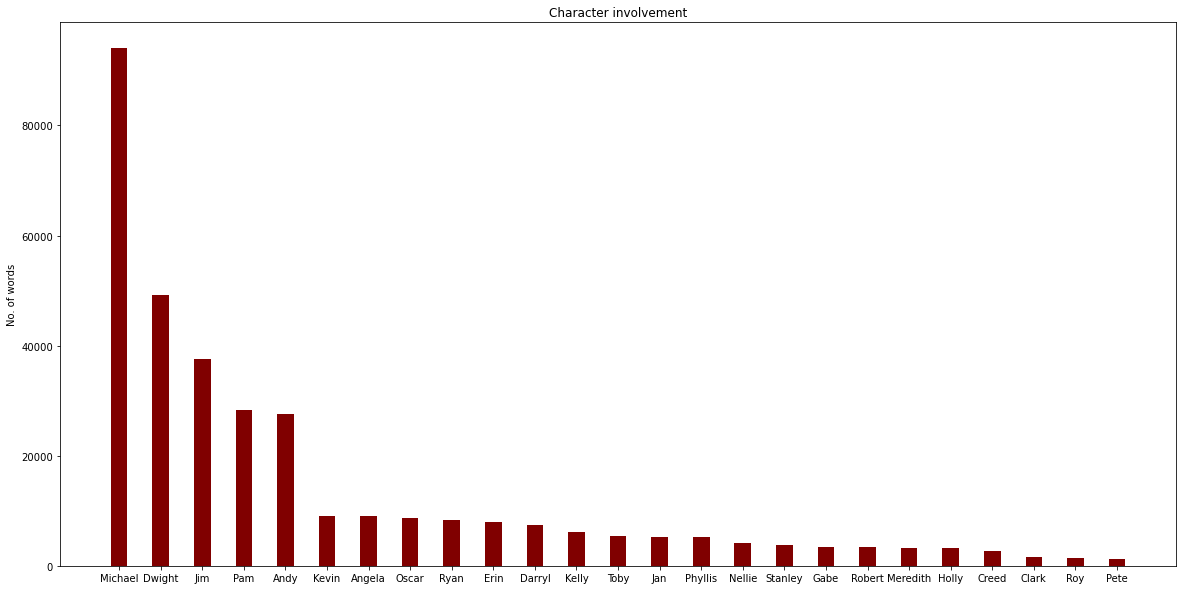

In [275]:
courses = list(sorted_by_length.keys())
values = list(sorted_by_length.values())
  
fig = plt.figure(figsize = (20, 10))
 
plt.bar(courses, values, color ='maroon',
        width = 0.4)

plt.ylabel("No. of words")
plt.title("Character involvement")
plt.show()

In [276]:
top_ten = {}
counter = 1
for person in sorted_by_length:
    top_ten[person] = main_characters[person]
    if counter > 9:
        break
    counter += 1

## Frequency Analysis and Lemmatization

After normalization and tokenization, I found the most frequent ones.

In [298]:
most_common_words = {}

for person in top_ten:
    filtered_data = filter_data(top_ten[person], 3)
    dist = nltk.FreqDist(itertools.chain(w.lower() for w in filtered_data))
    most_common_words[person] = dist.most_common(10)

In [279]:
df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in most_common_words.items() ]))
df

,Michael,Dwight,Jim,Pam,Andy,Kevin,Angela,Oscar,Ryan,Erin
0,"(know, 1269)","(what, 413)","(know, 523)","(yeah, 348)","(like, 308)","(yeah, 133)","(what, 96)","(what, 87)","(know, 94)","(andy, 113)"
1,"(okay, 892)","(know, 390)","(right, 397)","(know, 316)","(know, 277)","(like, 101)","(know, 96)","(know, 86)","(yeah, 90)","(like, 97)"
2,"(like, 800)","(okay, 328)","(yeah, 396)","(like, 294)","(yeah, 265)","(michael, 74)","(dwight, 80)","(michael, 85)","(like, 79)","(know, 74)"
3,"(right, 750)","(like, 314)","(okay, 366)","(michael, 278)","(what, 219)","(know, 74)","(like, 72)","(like, 67)","(what, 63)","(really, 71)"
4,"(well, 735)","(michael, 312)","(what, 322)","(okay, 272)","(right, 208)","(think, 72)","(think, 61)","(that, 66)","(want, 58)","(yeah, 70)"
5,"(that, 693)","(that, 271)","(think, 320)","(really, 242)","(well, 174)","(what, 71)","(would, 61)","(think, 63)","(that, 57)","(think, 56)"
6,"(good, 667)","(right, 259)","(really, 315)","(what, 231)","(that, 171)","(that, 61)","(well, 57)","(angela, 50)","(really, 55)","(sorry, 54)"
7,"(going, 652)","(good, 239)","(dwight, 287)","(think, 218)","(really, 149)","(well, 59)","(want, 53)","(yeah, 49)","(michael, 55)","(okay, 54)"
8,"(what, 648)","(yeah, 227)","(that, 270)","(well, 160)","(think, 142)","(really, 53)","(kevin, 49)","(right, 47)","(kelly, 51)","(what, 51)"
9,"(yeah, 593)","(come, 222)","(well, 256)","(dwight, 152)","(guys, 124)","(would, 52)","(that, 44)","(well, 44)","(okay, 50)","(that, 41)"


We see that most of the frequent words are the same adjectives. So I had lemmatized the words, then I got the most frequent **nouns** for each person.

In [291]:
most_common_NN_words = {}

lemma = nltk.WordNetLemmatizer()
lemmatized_words = {}

for person in top_ten:
    filtered_data = filter_data(top_ten[person], 3)
    lemmatized_words[person] = [lemma.lemmatize(t) for t in filtered_data]
    lemmatized_tokens = []
    for tag in nltk.pos_tag(lemmatized_words[person]):
        if tag[1].startswith('NN'):
            lemmatized_tokens.append(tag[0])
            

    dist = nltk.FreqDist(itertools.chain(token.lower() for token in lemmatized_tokens))
    most_common_NN_words[person] = dist.most_common(10)

In [292]:
df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in most_common_NN_words.items() ]))
df

,Michael,Dwight,Jim,Pam,Andy,Kevin,Angela,Oscar,Ryan,Erin
0,"(okay, 750)","(michael, 312)","(yeah, 327)","(yeah, 310)","(yeah, 237)","(yeah, 118)","(dwight, 78)","(michael, 85)","(yeah, 81)","(andy, 113)"
1,"(yeah, 509)","(okay, 281)","(okay, 317)","(michael, 278)","(well, 122)","(michael, 74)","(kevin, 48)","(angela, 50)","(michael, 55)","(yeah, 62)"
2,"(well, 489)","(yeah, 205)","(dwight, 285)","(okay, 230)","(time, 110)","(oscar, 43)","(well, 45)","(yeah, 42)","(kelly, 49)","(okay, 49)"
3,"(dwight, 389)","(time, 173)","(michael, 194)","(dwight, 151)","(thing, 106)","(time, 41)","(party, 38)","(kevin, 42)","(okay, 44)","(sorry, 39)"
4,"(people, 346)","(thing, 152)","(well, 174)","(well, 110)","(okay, 97)","(okay, 34)","(thank, 38)","(okay, 37)","(thing, 36)","(michael, 37)"
5,"(thing, 337)","(come, 136)","(thing, 132)","(time, 107)","(guy, 84)","(angela, 34)","(okay, 36)","(thing, 35)","(something, 28)","(well, 30)"
6,"(time, 324)","(well, 135)","(time, 132)","(thing, 91)","(erin, 80)","(well, 31)","(michael, 33)","(well, 31)","(time, 28)","(time, 28)"
7,"(everybody, 252)","(people, 122)","(right, 124)","(something, 84)","(dwight, 79)","(thing, 27)","(yeah, 31)","(andy, 31)","(look, 26)","(gabe, 26)"
8,"(something, 237)","(dwight, 108)","(work, 102)","(thank, 82)","(tuna, 68)","(people, 26)","(oscar, 31)","(time, 30)","(well, 25)","(dwight, 25)"
9,"(right, 215)","(thank, 106)","(alright, 100)","(people, 67)","(thank, 65)","(wait, 25)","(andy, 31)","(year, 27)","(people, 25)","(guy, 23)"


## Keywords

In order to get more accurate and important information, I find the keywords for each character.

### Install and import required libraries

In [302]:
!pip install yake

In [305]:
import yake

### Extract keywords

I used yake library for this task and found 10 keywords for each character.

In [342]:
keyword_extractor = yake.KeywordExtractor(lan="en", n=3, dedupLim=0.9, top=10, features=None)

keywords = {}

for person in top_ten:
    temp = keyword_extractor.extract_keywords(top_ten[person])
    rounded_element = []
    for element in temp:
        rounded_element.append((element[0], round(element[1], 7)))
    keywords[person] = rounded_element

In [343]:
df = pd.DataFrame(keywords)
df

,Michael,Dwight,Jim,Pam,Andy,Kevin,Angela,Oscar,Ryan,Erin
0,"(Michael Scott, 8e-05)","(Michael Michael Michael, 0.0001258)","(Dwight, 0.0001885)","(Michael, 0.0002062)","(Yeah, 0.0004004)","(Yeah, 0.0011243)","(Dwight, 0.0014413)","(Michael, 0.0013157)","(Yeah, 0.0020314)","(Andy, 0.0008481)"
1,"(Dwight, 0.0001236)","(Jim, 0.0001495)","(yeah, 0.0002737)","(yeah, 0.000321)","(guys, 0.0010742)","(Michael, 0.0019209)","(Kevin, 0.0032892)","(Angela, 0.0033308)","(Michael, 0.0025033)","(Yeah, 0.0027648)"
2,"(good, 0.0001349)","(Michael, 0.0001597)","(Pam, 0.000327)","(Jim, 0.0003291)","(Hey, 0.0013332)","(Jim, 0.0035196)","(God, 0.0045375)","(Kevin, 0.0039852)","(Kelly, 0.0028158)","(Andy coming back, 0.0045142)"
3,"(Pam, 0.000154)","(Dwight Schrute, 0.0001875)","(Michael, 0.0003809)","(Dwight, 0.0005445)","(Andy Bernard, 0.0013458)","(Pam, 0.0036887)","(Andy, 0.006008)","(Yeah, 0.0047732)","(Hey, 0.0031211)","(Hey, 0.0046472)"
4,"(Yeah, 0.0001704)","(Good, 0.0005529)","(Hey, 0.0004206)","(Hey, 0.0005836)","(gonna, 0.0013977)","(Oscar, 0.0038527)","(Michael, 0.0061525)","(hey, 0.0053164)","(guy, 0.0070399)","(Michael, 0.0047698)"
5,"(Michael Scott Paper, 0.0001756)","(yeah, 0.0006215)","(good, 0.0006288)","(Hey Michael, 0.001067)","(Erin, 0.001416)","(Hey, 0.0052078)","(Pam, 0.0068299)","(good, 0.0062613)","(good, 0.0083462)","(Pam, 0.0075371)"
6,"(Hey, 0.0001909)","(hey, 0.0006552)","(gonna, 0.0008781)","(God, 0.0012587)","(Good, 0.0015337)","(Angela, 0.0058053)","(party, 0.0069953)","(Andy, 0.0070959)","(guys, 0.0094885)","(guys, 0.0078273)"
7,"(Dunder Mifflin, 0.0002366)","(Assistant Regional Manager, 0.000785)","(God, 0.0015312)","(good, 0.001366)","(Dwight, 0.001654)","(guys, 0.0061386)","(Oscar, 0.0070934)","(gay, 0.0078313)","(Jim, 0.0102189)","(Gabe, 0.0097243)"
8,"(God, 0.0002592)","(Jim Halpert, 0.0008453)","(great, 0.0015543)","(Michael Scott, 0.0015872)","(Tuna, 0.0017982)","(gonna, 0.0095142)","(Senator, 0.0079595)","(guys, 0.0081902)","(Kelly Kapoor, 0.0102209)","(Andy coming, 0.0098509)"
9,"(Jim, 0.000286)","(Schrute, 0.0008542)","(back, 0.0017193)","(Dunder Mifflin, 0.0018849)","(guy, 0.0018876)","(Kevin, 0.0096508)","(yeah, 0.0080209)","(Dwight, 0.0113642)","(man, 0.0102548)","(Dwight, 0.0108828)"


## Sentiment Alalysis:
I used SentimentIntensityAnalyzer to determine the positivity and negativity and also neutrality of each person.

In [293]:
speeches = {}
lemmatized_words['Ryan']
for person in lemmatized_words:
    words = ""
    for word in lemmatized_words[person]:
        words += word.lower() + ' '
    speeches[person] = words

In [294]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

sentiments = {}
for person, speech in speeches.items():
    status = sia.polarity_scores(speech)
    sentiments[person] = [status['pos'], status['neu'], status['neg']]

In [295]:
df = pd.DataFrame(data=sentiments)
df.index = ['positive', 'neutral', 'negative']
df

,Michael,Dwight,Jim,Pam,Andy,Kevin,Angela,Oscar,Ryan,Erin
positive,0.295,0.263,0.319,0.344,0.274,0.312,0.262,0.241,0.303,0.315
neutral,0.581,0.623,0.589,0.566,0.632,0.582,0.605,0.655,0.618,0.578
negative,0.124,0.115,0.092,0.090,0.094,0.106,0.133,0.104,0.079,0.107


### Visualization

After the sentiment analysis I used bar chart to visualize condition of each person.

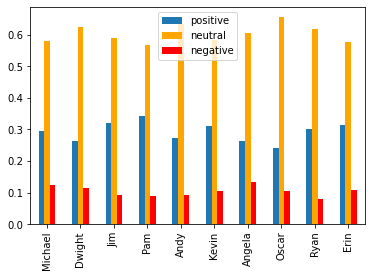

In [296]:
df.transpose().plot(kind='bar',color=[ "tab:blue", "orange", "r"])
plt.show()

### Most positive and most negative persons

In this part I determined the most positive and the most negative persons.

In [297]:
positively_sorted = {k: v for k, v in sorted(sentiments.items(), key=lambda item: item[1][0], reverse=True)}
negatively_sorted = {k: v for k, v in sorted(sentiments.items(), key=lambda item: item[1][2], reverse=True)}

most_positive_persons = {}
most_negative_persons = {}

counter = 1
print("most positive persons: ", end='')
for person in positively_sorted:
    print(person, end='  ')
    if counter > 2:
        break
    counter += 1

print()
print("most negative persons: ", end='')
counter = 1
for person in negatively_sorted:
    most_negative_persons[person] = negatively_sorted[person]
    print(person, end='  ')
    if counter > 2:
        break
    counter += 1

most positive persons: Pam  Jim  Erin  
most negative persons: Angela  Michael  Dwight  

### Pie chart for sentiment analysis

Finally I plot the sentiment data for the 6 people that have been mentioned above, in different pie charts. 

<ipython-input-287-da4b0ece06b2>:21: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  axis[1, 1].pie(df.Michael, colors=colors, labels=labels, explode=explode, autopct='%1.1f%%', counterclock=False, shadow=True)


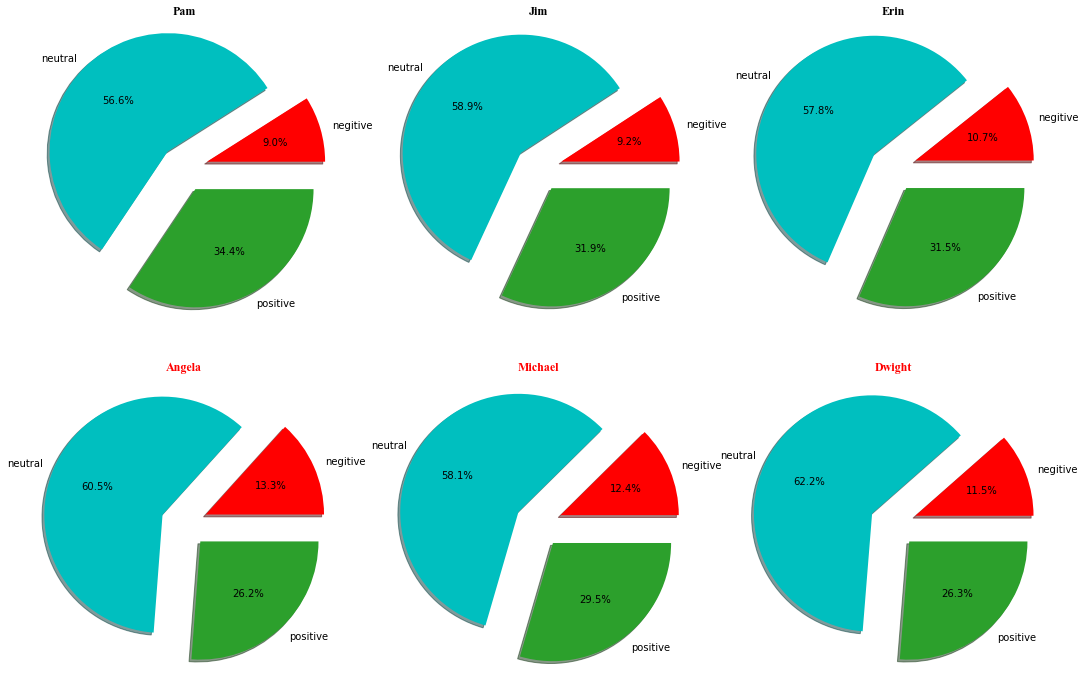

In [287]:
figure, axis = plt.subplots(2, 3)
figure.set_size_inches(18,12)
colors = ['tab:green', 'c', 'r']
labels = ['positive', 'neutral', 'negitive']
explode = (0.2, 0.2, 0.2)

#positives
axis[0, 0].pie(df.Pam, colors=colors, labels=labels, explode=explode, autopct='%1.1f%%', counterclock=False, shadow=True)
axis[0, 0].set_title('Pam', fontname="Times New Roman", fontweight="bold")

axis[0, 1].pie(df.Jim, colors=colors, labels=labels, explode=explode, autopct='%1.1f%%', counterclock=False, shadow=True)
axis[0, 1].set_title('Jim', fontname="Times New Roman", fontweight="bold")

axis[0, 2].pie(df.Erin, colors=colors, labels=labels, explode=explode, autopct='%1.1f%%', counterclock=False, shadow=True)
axis[0, 2].set_title('Erin', fontname="Times New Roman", fontweight="bold")

#negatives
axis[1, 0].pie(df.Angela, colors=colors, labels=labels, explode=explode, autopct='%1.1f%%', counterclock=False, shadow=True)
axis[1, 0].set_title('Angela', fontname="Times New Roman", fontweight="bold", color="r")

axis[1, 1].pie(df.Michael, colors=colors, labels=labels, explode=explode, autopct='%1.1f%%', counterclock=False, shadow=True)
axis[1, 1].set_title('Michael', fontname="Times New Roman", fontweight="bold", color="r")

axis[1, 2].pie(df.Dwight, colors=colors, labels=labels, explode=explode, autopct='%1.1f%%', counterclock=False, shadow=True)
axis[1, 2].set_title('Dwight', fontname="Times New Roman", fontweight="bold", color="r")


plt.show()